# GWRATES complete example

This notebook is created by [Phurailatpam Hemantakumar](https://hemantaph.com).

[![Documentation](https://img.shields.io/badge/ler-documentation-blue)](https://ler.hemantaph.com) 

GWRATES is a comprehensive framework for simulating gravitational wave (GW) events and calculating their detection rates. This notebook provides a complete example of CBC event simulation and rate calculation.

## Table of Contents

1. [Part 1: Basic GW Event Simulation and Rate Calculation (BBH Example)](#part-1-basic-gw-event-simulation-and-rate-calculation-bbh-example)
   - [1.1 Initialize GWRATES](#11-initialize-gwrates)
   - [1.2 Simulate GW Population](#12-simulate-gw-population)
   - [1.3 Calculate Detection Rates](#13-calculate-detection-rates)
   - [1.4 Inspect Generated Parameters](#14-inspect-generated-parameters)
   - [1.5 Access Saved Data Files](#15-access-saved-data-files)
   - [1.6 Load and Examine Saved Parameters](#16-load-and-examine-saved-parameters)
   - [1.7 Examine Available Prior Functions](#17-examine-available-prior-functions)
   - [1.8 Visualize Parameter Distributions](#18-visualize-parameter-distributions)

2. [Part 2: Custom Functions and Parameters](#part-2-custom-functions-and-parameters)
   - [2.1 Define Custom Source Frame Masses](#21-define-custom-source-frame-masses)
   - [2.2 Define Event Type with Non-Spinning Configuration](#22-define-event-type-with-non-spinning-configuration)
   - [2.3 Define Custom Merger Rate Density](#23-define-custom-merger-rate-density)
   - [2.4 Define Custom Detection Criteria](#24-define-custom-detection-criteria)
   - [2.5 Initialize GWRATES with Custom Settings](#25-initialize-gwrates-with-custom-settings)
   - [2.6 Sample GW Parameters with Custom Settings](#26-sample-gw-parameters-with-custom-settings)
   - [2.7 Calculate Rates with Custom Settings](#27-calculate-rates-with-custom-settings)
   - [2.8 Compare Default and Custom Mass Distributions](#28-compare-default-and-custom-mass-distributions)

3. [Part 3: Advanced Sampling - Generating Detectable Events](#part-3-advanced-sampling---generating-detectable-events)
   - [3.1 Initialize GWRATES for N-Event Sampling](#31-initialize-gwrates-for-n-event-sampling)
   - [3.2 Sample Until N Detectable Events Are Found](#32-sample-until-n-detectable-events-are-found)
   - [3.3 Analyze Rate Convergence](#33-analyze-rate-convergence)
   - [3.4 Assess Rate Stability](#34-assess-rate-stability)
   - [3.5 Overlapping plot between the all sampled and detectable event parameters](#35-overlapping-plot-between-the-all-sampled-and-detectable-event-parameters)

---

## Part 1: Basic GW Event Simulation and Rate Calculation (BBH Example)

This section demonstrates a quick example to simulate binary black hole mergers and calculate their detection rates.



### 1.1 Initialize GWRATES

The `GWRATES` class is the main interface for simulating GW events and calculating rates. By default, it uses:
- **Event type:** BBH (Binary Black Hole)
- **Detectors:** H1, L1, V1 (LIGO Hanford, LIGO Livingston, Virgo) with O4 design sensitivity

All outputs will be saved in the `./ler_data` directory.

In [33]:
# Import the GWRATES class from the ler package
from ler.rates import GWRATES

# Initialize GWRATES with default settings
ler = GWRATES(verbose=True)


Initializing GWRATES class...


Initializing CBCSourceRedshiftDistribution...

luminosity_distance interpolator will be loaded from ./interpolator_json/luminosity_distance/luminosity_distance_0.json
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differential_comoving_volume/differential_comoving_volume_0.json
using ler available merger rate density model: merger_rate_density_bbh_oguri2018
merger_rate_density_bbh_oguri2018 interpolator will be loaded from ./interpolator_json/merger_rate_density/merger_rate_density_bbh_oguri2018_0.json
merger_rate_density_detector_frame interpolator will be loaded from ./interpolator_json/merger_rate_density/merger_rate_density_detector_frame_1.json
source_redshift interpolator will be loaded from ./interpolator_json/source_redshift/source_redshift_0.json

Initializing CBCSourceParameterDistribution...

using ler available zs function : source_redshift
using ler available source_frame_masses function : binary_masses_BB

To print all initialization input arguments, use:

```python
    ler._print_all_init_args()
```

### 1.2 Simulate GW Population

Generate a population of Compact Binary Coalescence (CBC) events. This step:
- Samples intrinsic (masses and spins) and extrinsic (redshift, sky location, inclination angle, etc.) GW parameters from initialized priors
- Calculates the probability of detection (Pdet) for each event based on detector network sensitivity
- Stores the output in `./ler_data/gw_param.json`

**Parameters:**
- `size`: Total number of events to sample
- `batch_size`: Events per batch (useful for resuming interrupted simulations)
- `resume`: If `True` (default), resume from last saved batch; if `False`, start fresh
- `save_batch`: If `True`, save after each batch; if `False` (default), save only at the end

**Note:** For realistic results, use `size >= 1,000,000` with `batch_size = 100,000`

In [36]:
# Simulate 100,000 GW events in batches of 50,000
gw_param_all = ler.gw_cbc_statistics(100000, resume=False)

# # with all input args
# gw_param_all = ler.gw_cbc_statistics(size=100000, batch_size=50000, resume=True, save_batch=False, output_jsonfile='gw_param.json') 

print(f"\nTotal events simulated: {len(gw_param_all['zs'])}")
print(f"Sampled redshift values: {gw_param_all['zs'][:5]}")

Simulated GW params will be stored in ./ler_data/gw_param.json
Batch no. 1
sampling gw source params...
calculating pdet...
Batch no. 2
sampling gw source params...
calculating pdet...
saving all gw parameters in ./ler_data/gw_param.json 

Total events simulated: 100000
Sampled redshift values: [1.79134769 3.81532071 6.88004063 0.94640131 0.64046894]


### 1.3 Calculate Detection Rates

Select detectable events and calculate the detection rate. This function:
- Filters events using a Pdet threshold. By default, Pdet is based on observed SNR > 10, where the observed SNR follows a non-central chi-squared distribution centered at the optimal SNR.
- Returns the rate in detectable events per year.
- Saves detectable events to `./ler_data/gw_param_detectable.json`.

In [42]:
# Calculate the detection rate and extract detectable events
detectable_rate, gw_param_detectable = ler.gw_rate()

print(f"\n=== Detection Rate Summary ===")
print(f"Detectable event rate: {detectable_rate:.2e} events per year")
print(f"Total event rate: {ler.normalization_pdf_z:.2e} events per year")
print(f"Percentage fraction of the detectable events: {detectable_rate/ler.normalization_pdf_z*100:.2e}%")

Getting gw parameters from json file ./ler_data/gw_param.json...
total GW event rate (yr^-1): 270.52624492169423
number of simulated GW detectable events: 329
number of simulated all GW events: 100000
storing detectable params in ./ler_data/gw_param_detectable.json

=== Detection Rate Summary ===
Detectable event rate: 2.71e+02 events per year
Total event rate: 8.22e+04 events per year
Percentage fraction of the detectable events: 3.29e-01%


### 1.4 Inspect Generated Parameters

View the available parameters in the generated event population.

In [43]:
# List all parameters saved for detectable events
print("Detectable event parameters:")
print(list(gw_param_detectable.keys()))

print("\nExample values for mass_1_source (detector frame):")
print(gw_param_detectable['mass_1_source'][:5])

Detectable event parameters:
['zs', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'a_1', 'a_2', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'pdet_L1', 'pdet_H1', 'pdet_V1', 'pdet_net']

Example values for mass_1_source (detector frame):
[27.80174506 13.5874931  26.44581764 15.18232487 11.86442242]


### 1.5 Access Saved Data Files

All simulation results are saved in JSON files for future reference and analysis.

In [44]:
# View the directory structure and file names
print(f"Output directory: {ler.ler_directory}")
print(f"\nSaved JSON files:")
for key, filename in ler.json_file_names.items():
    print(f"  {key}: {filename}")

Output directory: ./ler_data

Saved JSON files:
  gwrates_params: gwrates_params.json
  gw_param: gw_param.json
  gw_param_detectable: gw_param_detectable.json


### 1.6 Load and Examine Saved Parameters

Reload parameters from JSON files for further analysis.

In [45]:
from ler.utils import get_param_from_json, load_json

# Load detectable parameters from file
gw_param_from_file = get_param_from_json(
    ler.ler_directory + '/' + ler.json_file_names['gw_param_detectable']
)

print(f"Parameters loaded from file: {list(gw_param_from_file.keys())}")

# Load the initialization parameters and rates
gwrates_params = load_json(ler.ler_directory + '/gwrates_params.json')
print(f"\nDetectable event rate (from saved file): {gwrates_params['detectable_gw_rate_per_year']:.4e} per year")

Parameters loaded from file: ['zs', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'a_1', 'a_2', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'pdet_L1', 'pdet_H1', 'pdet_V1', 'pdet_net']

Detectable event rate (from saved file): 2.7053e+02 per year


### 1.7 Examine Available Prior Functions

View the built-in GW parameter sampler functions and their default parameters.

In [48]:
# Display all available GW prior sampler functions
print("Built-in GW parameter sampler functions and parameters:\n")
for func_name, func_params in ler.available_gw_prior.items():
    print(f"{func_name}:")
    
    if isinstance(func_params, dict):
        for param_name, param_value in func_params.items():
            print(f"  {param_name}: {param_value}")
    else:
        print(f"  {func_params}")
    print()

Built-in GW parameter sampler functions and parameters:

merger_rate_density:
  merger_rate_density_bbh_oguri2018: {'R0': 2.39e-08, 'b2': 1.6, 'b3': 2.1, 'b4': 30}
  sfr_madau_fragos2017: {'a': 0.01, 'b': 2.6, 'c': 3.2, 'd': 6.2}
  sfr_madau_dickinson2014: {'a': 0.015, 'b': 2.7, 'c': 2.9, 'd': 5.6}
  sfr_with_time_delay: {'R0': 2.39e-08, 'a': 0.01, 'b': 2.6, 'c': 3.2, 'd': 6.2, 'td_min': 0.01, 'td_max': 10.0}
  merger_rate_density_bbh_popIII_ken2022: {'n0': 1.92e-08, 'aIII': 0.66, 'bIII': 0.3, 'zIII': 11.6}
  merger_rate_density_bbh_primordial_ken2022: {'n0': 4.4e-11, 't0': 13.786885302009708}
  sfr_madau_fragos2017_with_bbh_dt: {'R0': 2.39e-08}
  sfr_madau_dickinson2014_with_bbh_dt: {'R0': 2.39e-08}
  sfr_madau_fragos2017_with_bns_dt: {'R0': 1.0550000000000001e-07}
  sfr_madau_dickinson2014_with_bns_dt: {'R0': 1.0550000000000001e-07}

zs:
  source_redshift: None

source_frame_masses:
  binary_masses_BBH_popI_II_powerlaw_gaussian: {'mminbh': 4.98, 'mmaxbh': 112.5, 'alpha': 3.78, 'mu_g'

### 1.8 Visualize Parameter Distributions

Create KDE (Kernel Density Estimation) plots to compare the distributions of parameters between all simulated events and detectable events.

getting gw_params from json file ler_data/gw_param_detectable.json...
getting gw_params from json file ler_data/gw_param.json...


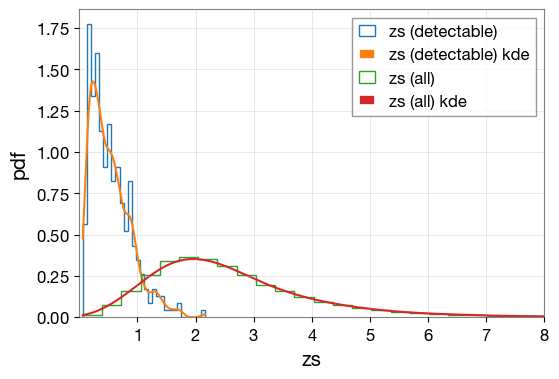

In [49]:
import matplotlib.pyplot as plt
from ler.utils import plots as lerplt


# input param_dict can be either a dictionary or a json file name that contains the parameters
plt.figure(figsize=(6, 4))
lerplt.param_plot(
    param_name='zs',
    param_dict='ler_data/gw_param_detectable.json',
    plot_label='zs (detectable)',
)
lerplt.param_plot(
    param_name='zs',
    param_dict='ler_data/gw_param.json',
    plot_label='zs (all)',
)
plt.xlim(0.001,8)
plt.xlabel('zs')
plt.ylabel('pdf')
plt.grid(alpha=0.4)
plt.show()

---

## Part 2: Custom Functions and Parameters

This section demonstrates how to customize GWRATES with your own sampling functions and detection criteria. We'll create a BNS (Binary Neutron Star) example with custom settings:

| Component | Custom Configuration | Default (BBH) |
| :--- | :--- | :--- |
| **Event Type** | BNS (non-spinning) | BBH (spinning, aligned) |
| **Merger Rate** | Madau-Dickinson (2014) | GWTC-4 based |
| **Source Masses** | Uniform 1.0-2.3 $M_{\odot}$ | Bimodal Gaussian |
| **Detectors** | 3G (ET, CE), SNR > 12 | O4 (H1, L1, V1), SNR > 10 |

**Notes:**
- **GW parameter sampling priors**: Should be a function with `size` as the only input argument. Can also be a class object of `ler.utils.FunctionConditioning`.
- **Merger rate density**: Should be a function of F(z).

### 2.2 Define Event Type with Non-Spinning Configuration

Using `event_type='BNS'` in the LeR class initialization will default to the following GW parameter priors corresponding to BNS. Other allowed event types are 'BBH' and 'NSBH'.

```python
    source_priors = dict(
        merger_rate_density = 'merger_rate_density_madau_dickinson2014',
        source_frame_masses = 'binary_masses_BNS_bimodal',
        a_1 = 'sampler_uniform',
        a_2 = 'sampler_uniform',
    ),
    source_priors_params= dict(
        merger_rate_density = dict(
            R0=89 * 1e-9, 
            a=0.015, 
            b=2.7, 
            c=2.9, 
            d=5.6,
        ),
        source_frame_masses = dict(
            w=0.643, 
            muL=1.352, 
            sigmaL=0.08, 
            muR=1.88, 
            sigmaR=0.3, 
            mmin=1.0, 
            mmax=2.3,
        ),
        a_1 = dict(xmin=-0.05, xmax=0.05),
        a_2 = dict(xmin=-0.05, xmax=0.05),
    ),
```

We will change some of these priors with our custom ones in the next sections.

For non-spinning configuration (faster calculation in our example), we can set:

```python
    spin_zero=True,
    spin_precession=False,
```

### 2.2 Define Custom Merger Rate Density

Using the default BNS merger rate density prior model, we change the local merger rate density from the default value of $R_0 = 89 \times 10^{-9} \, \text{Mpc}^{-3}\text{yr}^{-1}$ (GWTC-4) to $R_0 = 105.5 \times 10^{-9} \, \text{Mpc}^{-3}\text{yr}^{-1}$ (GWTC-3). 

### 2.3 Define Custom Merger Rate Density

Using the default BNS merger rate density prior model, we change the local merger rate density from the default value of $R_0 = 89 \times 10^{-9} \, \text{Mpc}^{-3}\text{yr}^{-1}$ (GWTC-4) to $R_0 = 105.5 \times 10^{-9} \, \text{Mpc}^{-3}\text{yr}^{-1}$ (GWTC-3).

In [ ]:
# Use built-in Madau-Dickinson (2014) SFR based merger rate density for BNS
merger_rate_density_function = 'merger_rate_density_madau_dickinson2014'

# Custom parameters for merger rate density (Madau-Dickinson model)
merger_rate_density_input_args = dict(
    R0=89e-9,      # Local merger rate density (Mpc^-3 yr^-1)
    a=0.015,       # Evolution parameter a
    b=2.7,         # Evolution parameter b
    c=2.9,         # Evolution parameter c
    d=5.6,         # Evolution parameter d
)

print("Merger rate density function:", merger_rate_density_function)
print("Parameters:", merger_rate_density_input_args)

Merger rate density function: merger_rate_density_bbh_oguri2018
Parameters: {'R0': 1.0550000000000001e-07, 'b2': 1.6, 'b3': 2.1, 'b4': 30}


### 2.1 Define Custom Source Frame Masses

Use a uniform distribution to sample binary masses (mass_1 and mass_2). Ensure mass_1 >= mass_2 by swapping if necessary.

In [ ]:
import numpy as np

# Define mass range for BNS
source_frame_masses_args = dict(
    mmin=1.0,   # Minimum mass in solar masses
    mmax=2.3,   # Maximum mass in solar masses
)

def source_frame_masses_uniform(size, mmin=source_frame_masses_args['mmin'], mmax=source_frame_masses_args['mmax']):
    """
    Sample mass_1 and mass_2 uniformly from a specified range, ensuring mass_1 >= mass_2 by swapping if necessary.
    
    Parameters
    ----------
    size : int
        Number of samples to draw
    mmin : float, optional
        Minimum mass in solar masses (default: 1.0)
    mmax : float, optional
        Maximum mass in solar masses (default: 2.3)
    
    Returns
    -------
    mass_1_source : ndarray
        Array of primary mass samples (larger mass)
    mass_2_source : ndarray
        Array of secondary mass samples (smaller mass)
    """
    # Sample masses uniformly
    mass_1_source = np.random.uniform(mmin, mmax, size)
    mass_2_source = np.random.uniform(mmin, mmax, size)
    
    # Ensure mass_1 >= mass_2 by swapping if necessary
    idx = mass_2_source > mass_1_source
    mass_1_source[idx], mass_2_source[idx] = mass_2_source[idx], mass_1_source[idx]
    
    return (mass_1_source, mass_2_source)

# Test the function
m1_test, m2_test = source_frame_masses_uniform(size=5)
print("Test mass samples:")
print(f"  mass_1: {m1_test}")
print(f"  mass_2: {m2_test}")
print(f"  mass_1 >= mass_2: {(m1_test >= m2_test).all()}")

Test mass samples:
  mass_1: [1.25390248 1.97542099 1.824485   2.15927396 1.63832471]
  mass_2: [1.04427987 1.2296851  1.01247127 1.54740765 1.0178791 ]
  mass_1 >= mass_2: True


### 2.4 Define Custom Detection Criteria

Create a custom detection function using 3G detectors (Einstein Telescope and Cosmic Explorer) with a higher SNR threshold. We use `pdet = optimal_SNR_net > 12` instead of the default `pdet` based on `observed_SNR_net > 10`.

This function takes GW parameters as input and returns Pdet as a boolean or probability array indicating detectability.

In [ ]:
from gwsnr import GWSNR

# Define mass and redshift ranges for BNS
mmin = 1.0
mmax = 2.3
zmin = 0.0
zmax = 10.0
snr_threshold_network = 12  # SNR threshold for detection (default: 10) 

# Initialize GWSNR for 3G detectors (no spins for BNS)
gwsnr_3g = GWSNR(
    npool=4,
    ifos=['ET', 'CE'],  # Einstein Telescope and Cosmic Explorer
    snr_method='interpolation_no_spins',  # No spin precession for BNS
    mtot_min=2*mmin*(1+zmin),
    mtot_max=2*mmax*(1+zmax),
    sampling_frequency=2048.0,
    waveform_approximant='IMRPhenomD',
    minimum_frequency=20.0,
    gwsnr_verbose=False,
)

def detection_criteria(gw_param_dict):
    """
    Determine if a gravitational wave event is detectable based on SNR threshold.
    
    Parameters
    ----------
    gw_param_dict : dict
        Dictionary containing GW parameters including mass_1, mass_2, luminosity_distance, etc.
    
    Returns
    -------
    dict
        Dictionary with 'pdet_net' (boolean detection array) and 'optimal_snr_net'
    """
    result_dict = {}
    
    # Calculate optimal SNR for all detectors
    snr_dict = gwsnr_3g.optimal_snr(gw_param_dict=gw_param_dict)
    
    # Apply detection threshold
    result_dict['pdet_net'] = snr_dict['optimal_snr_net'] > snr_threshold_network
    
    return result_dict

print("Custom detection criteria defined for 3G detectors (ET + CE)")
print(f"Detection network SNR threshold: {snr_threshold_network}")

# Test the detection criteria function
gw_param_dict = dict(
    mass_1 = np.array([2.0, 2.0]),
    mass_2 = np.array([1.0, 1.0]),
    luminosity_distance = np.array([1000.0, 10000.0]),
)
pdet = detection_criteria(gw_param_dict=gw_param_dict)
print("\nTest detection calculation:")
print(f"  mass_1 array: {gw_param_dict['mass_1']}")
print(f"  mass_2 array: {gw_param_dict['mass_2']}")
print(f"  luminosity_distance array: {gw_param_dict['luminosity_distance']}")
print(f"  Pdet result: {pdet}")


Initializing GWSNR class...

Interpolator will be loaded for ET1 detector from ./interpolator_json/ET1/partialSNR_dict_0.json
Interpolator will be loaded for ET2 detector from ./interpolator_json/ET2/partialSNR_dict_0.json
Interpolator will be loaded for ET3 detector from ./interpolator_json/ET3/partialSNR_dict_0.json
Interpolator will be loaded for CE detector from ./interpolator_json/CE/partialSNR_dict_0.json


Custom detection criteria defined for 3G detectors (ET + CE)
Detection network threshold: 12 SNR

Test Pdet calculation:
  mass_1 array : [2. 2.]
  mass_2 array : [1. 1.]
  luminosity_distance array: [ 1000. 10000.]
  Pdet array : {'pdet_net': array([ True, False])}


### 2.5 Initialize GWRATES with Custom Settings

Create a GWRATES instance with the custom functions and parameters defined above.

In [ ]:
from ler import GWRATES

# Initialize GWRATES with custom functions
ler_custom = GWRATES(
    # LeR setup parameters
    npool=6,
    z_min=0.001,
    z_max=10,
    verbose=True,
    event_type="BNS",  # Binary Neutron Star
    spin_zero=True,
    
    # Custom source parameter priors
    source_priors=dict(
        merger_rate_density=merger_rate_density_function,
        source_frame_masses=source_frame_masses_uniform,  # Custom function
    ),
    source_priors_params=dict(
        merger_rate_density=merger_rate_density_input_args,
        source_frame_masses=source_frame_masses_args,
    ),
    
    # Custom detection criteria
    pdet_finder=detection_criteria,
    ler_directory='./ler_data_custom',  # Save in a separate directory
)


Initializing GWRATES class...


Initializing CBCSourceRedshiftDistribution...

luminosity_distance interpolator will be loaded from ./interpolator_json/luminosity_distance/luminosity_distance_2.json
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differential_comoving_volume/differential_comoving_volume_2.json
using ler available merger rate density model: merger_rate_density_bbh_oguri2018
merger_rate_density_bbh_oguri2018 interpolator will be loaded from ./interpolator_json/merger_rate_density/merger_rate_density_bbh_oguri2018_4.json
merger_rate_density_detector_frame interpolator will be loaded from ./interpolator_json/merger_rate_density/merger_rate_density_detector_frame_5.json
source_redshift interpolator will be loaded from ./interpolator_json/source_redshift/source_redshift_2.json

Initializing CBCSourceParameterDistribution...

using ler available zs function : source_redshift
using user defined custom source_frame_masses function
using ler av

### 2.6 Sample GW Parameters with Custom Settings

In [23]:
# Sample GW population with custom settings
gw_params_custom = ler_custom.gw_cbc_statistics(
    size=100000,
    batch_size=50000,
    resume=False,  # Start fresh
    output_jsonfile='custom_gw_params.json'
)

print(f"\nSampled {len(gw_params_custom['zs'])} custom BNS events")

Simulated GW params will be stored in ./ler_data_custom/custom_gw_params.json
Batch no. 1
sampling gw source params...
calculating pdet...
Batch no. 2
sampling gw source params...
calculating pdet...
saving all gw parameters in ./ler_data_custom/custom_gw_params.json 

Sampled 100000 custom BNS events


### 2.7 Calculate Rates with Custom Settings

In [ ]:
# Calculate detection rates with custom settings
detectable_rate_custom, gw_param_detectable_custom = ler_custom.gw_rate()

# Calculate fraction of detectable events
total_rate_custom = ler_custom.normalization_pdf_z
fraction_detectable = detectable_rate_custom / total_rate_custom

print(f"\n=== Custom BNS Detection Results (3G Detectors Sensitivity) ===")
print(f"Detectable BNS event rate: {detectable_rate_custom:.4e} events per year")
print(f"Total BNS event rate: {total_rate_custom:.4e} events per year")
print(f"Detectable fraction: {fraction_detectable*100:.2f}%")

Getting gw parameters from json file ./ler_data_custom/custom_gw_params.json...
total GW event rate (yr^-1): 73925.64600292277
number of simulated GW detectable events: 20367
number of simulated all GW events: 100000
storing detectable params in ./ler_data_custom/gw_param_detectable.json

=== Custom BNS Detection Results (under 3G detectors sesitivity) ===
Detectable BNS event rate: 7.3926e+04 events per year
Total BNS event rate: 3.6297e+05 events per year
Detectable fraction: 20.37%


### 2.8 Compare Default and Custom Mass Distributions

GWRATES uses `binary_masses_BNS_bimodal` as the default mass distribution for BNS events. Here we compare the default distribution with our custom uniform mass distribution defined earlier.

binary_masses_BNS_bimodal interpolator will be loaded from ./interpolator_json/source_frame_masses/binary_masses_BNS_bimodal_0.json


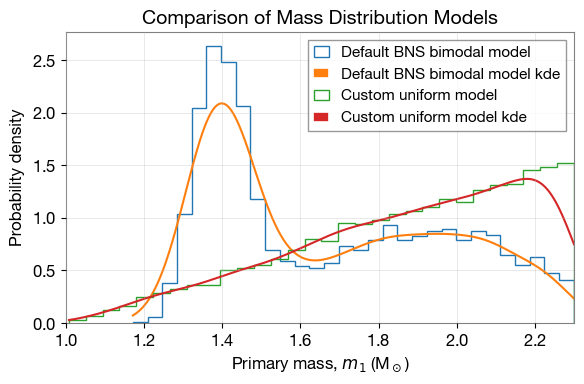

In [28]:
import matplotlib.pyplot as plt
from ler.utils import plots as lerplt

# Sample from default BNS mass distribution
mass_1_default, mass_2_default = ler_custom.binary_masses_BNS_bimodal(size=10000)
default_mass_dict = dict(mass_1_source=mass_1_default)

# Sample from custom mass distribution
mass_1_custom, mass_2_custom = source_frame_masses_uniform(size=10000)
custom_mass_dict = dict(mass_1_source=mass_1_custom)

# Create comparison plot
plt.figure(figsize=(6, 4))

# Plot default model
lerplt.param_plot(
    param_name='mass_1_source',
    param_dict=default_mass_dict,
    plot_label='Default BNS bimodal model',
)

# Plot custom model
lerplt.param_plot(
    param_name='mass_1_source',
    param_dict=custom_mass_dict,
    plot_label='Custom uniform model',
)

plt.xlabel(r'Primary mass, $m_1$ (M$_\odot$)', fontsize=12)
plt.ylabel('Probability density', fontsize=12)
plt.title('Comparison of Mass Distribution Models', fontsize=14, fontweight='bold')
plt.xlim(1, 2.3)
plt.legend(fontsize=11)
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

---

## Part 3: Advanced Sampling - Generating Detectable Events

This section demonstrates how to generate a specific number of detectable events and monitor detection rate convergence.

### 3.1 Initialize GWRATES for N-Event Sampling

In [29]:
# Create a new GWRATES instance for N-event sampling
ler_n_events = GWRATES(
    npool=6,
    verbose=False,
)


Initializing GWRATES class...



### 3.2 Sample Until N Detectable Events Are Found

This function will:
- Continue sampling in batches until at least N detectable events are found
- Monitor rate convergence using a stopping criteria (e.g., relative rate difference < 0.5%)
- Calculate rates dynamically at each batch
- Allow resuming from the last batch if interrupted

In [ ]:
# Sample until we have at least 10,000 detectable events with converged rates
detectable_rate_n, gw_param_detectable_n = ler_n_events.selecting_n_gw_detectable_events(
    size=10000,  # Target number of detectable events
    batch_size=100000,  # Events per batch
    stopping_criteria=dict(
        relative_diff_percentage=0.5,  # Stop when rate change < 0.5% (use 0.1% for better convergence)
        number_of_last_batches_to_check=4  # Check last 4 batches
    ),
    pdet_threshold=0.5,  # Probability threshold for detection
    resume=False,  # Start fresh
    output_jsonfile='gw_params_n_detectable.json',
    meta_data_file='meta_gw.json',  # Store metadata (rates per batch)
    pdet_type='boolean',
    trim_to_size=False,  # Keep all events found until convergence
)

print(f"\n=== N-Event Sampling Results ===")
print(f"Detectable event rate: {detectable_rate_n:.4e} events per year")
print(f"Collected number of detectable events: {len(gw_param_detectable_n['zs'])}")

stopping criteria set to when relative difference of total rate for the last 4 cumulative batches is less than 0.5%.
sample collection will stop when the stopping criteria is met and number of detectable events exceeds the specified size.
removing ./ler_data/gw_params_n_detectable.json and ./ler_data/meta_gw.json if they exist
collected number of detectable events =  0
collected number of detectable events =  334
total number of events =  100000
total rate (yr^-1): 274.6375860299267
collected number of detectable events =  656
total number of events =  200000
total rate (yr^-1): 269.7039767000478
collected number of detectable events =  948
total number of events =  300000
total rate (yr^-1): 259.8367580402899
collected number of detectable events =  1287
total number of events =  400000
total rate (yr^-1): 264.56480031475724
collected number of detectable events =  1657
total number of events =  500000
total rate (yr^-1): 272.4996886536458
percentage difference of total rate for the l

### 3.3 Analyze Rate Convergence

Plot the evolution of the detection rate across batches to verify convergence.

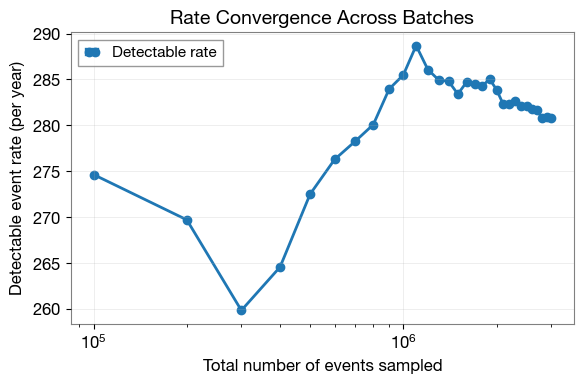

In [47]:
import matplotlib.pyplot as plt
from ler.utils import get_param_from_json

# Load metadata containing rates for each batch
meta_data = get_param_from_json(ler_n_events.ler_directory + '/meta_gw.json')

# Plot rate vs sampling size
plt.figure(figsize=(6, 4))
plt.plot(
    meta_data['events_total'],
    meta_data['total_rate'],
    'o-',
    linewidth=2,
    markersize=6,
    label='Detectable rate'
)

plt.xlabel('Total number of events sampled', fontsize=12)
plt.ylabel('Detectable event rate (per year)', fontsize=12)
plt.title('Rate Convergence Across Batches', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.legend(fontsize=11)
plt.xscale('log')
plt.tight_layout()
plt.show()

### 3.4 Assess Rate Stability

Calculate the average rate from the last batches to verify convergence.

In [ ]:
import numpy as np

# Select rates from the last batches
idx_converged = [-4, -3, -2, -1]
rates_converged = np.array(meta_data['total_rate'])[idx_converged]

if len(rates_converged) > 0:
    mean_rate = rates_converged.mean()
    std_rate = rates_converged.std()
    
    print(f"\n=== Rate Stability Analysis ===")
    print(f"Number of converged batches: {len(rates_converged)}")
    print(f"Mean rate (converged): {mean_rate:.4e} events per year")
    print(f"Standard deviation: {std_rate:.4e} events per year")
    print(f"Relative uncertainty: {(std_rate/mean_rate)*100:.2f}%")
else:
    print("Not enough batches to assess convergence.")


=== Rate Stability Analysis ===
Number of converged batches: 4
Mean rate (converged): 2.8103e+02 events per year
Standard deviation: 3.5386e-01 events per year
Relative uncertainty: 0.13%


### 3.5 Compare All Sampled and Detectable Event Parameters

Create an overlapping visualization comparing the parameter distributions of all sampled events with detectable events only.

In [49]:
# generate CBC (all) parameters
gw_param = ler_n_events.gw_cbc_statistics(10000, resume=False)

Simulated GW params will be stored in ./ler_data/gw_param.json
Batch no. 1
sampling gw source params...
calculating pdet...
gw parameters already sampled.


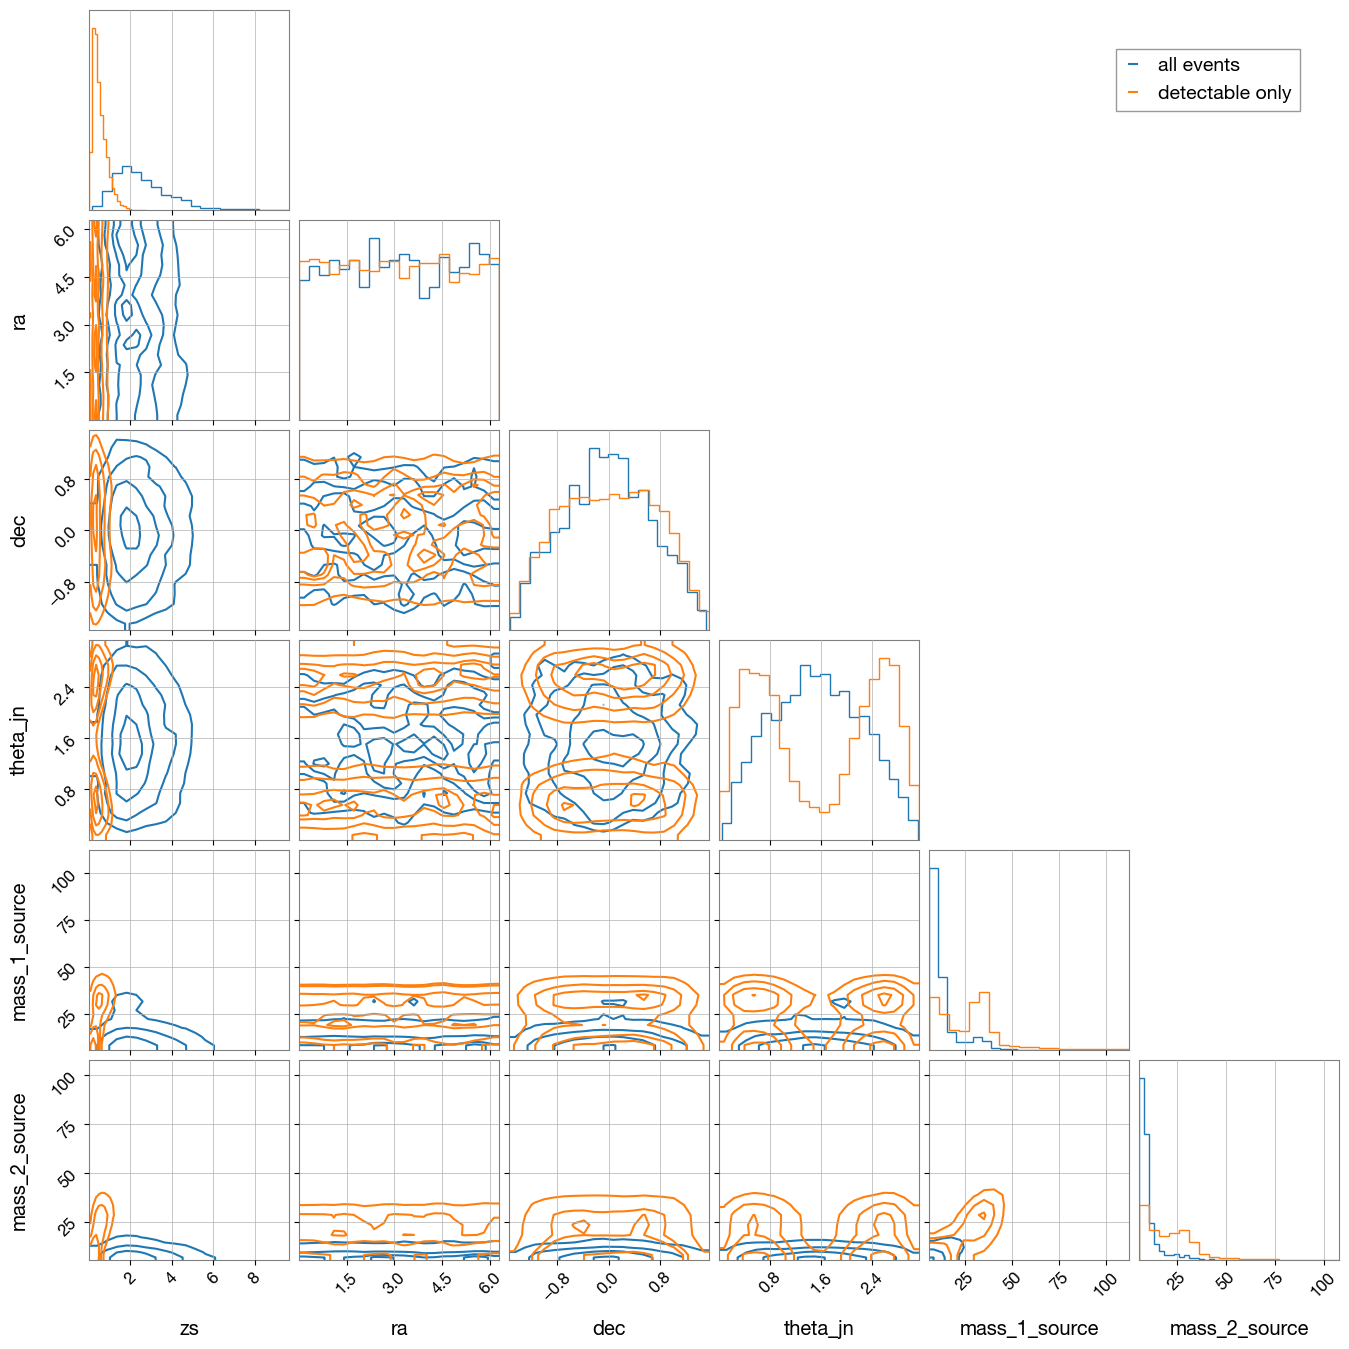

In [ ]:
import corner
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from ler.utils import get_param_from_json

param = get_param_from_json('ler_data/gw_param.json')
param_detectable = get_param_from_json('./ler_data/gw_params_n_detectable.json')

param_names = ['zs', 'ra', 'dec', 'theta_jn', 'mass_1_source', 'mass_2_source']

# Prepare data for corner plot
samples_unlensed = np.stack([param[p] for p in param_names], axis=1)
samples_detectable = np.stack([param_detectable[p] for p in param_names], axis=1)

# Generate corner plot
fig = corner.corner(
    samples_unlensed, 
    labels=param_names, 
    color='C0', 
    alpha=0.5,
    plot_density=False, plot_datapoints=False, smooth=0.8,
    hist_kwargs={'density': True}
)
blue_line = mlines.Line2D([], [], color='C0', label='all events')

# Plot detectable events
corner.corner(
    samples_detectable, 
    labels=param_names, 
    color='C1', 
    alpha=0.5,
    fig=fig, 
    plot_density=False, plot_datapoints=False, smooth=0.8,
    hist_kwargs={'density': True}
)
orange_line = mlines.Line2D([], [], color='C1', label='detectable only')

# Add legend
fig.legend(handles=[blue_line, orange_line], loc='upper right', bbox_to_anchor=(0.95, 0.95), fontsize=14)

plt.show()

---

## Summary

This notebook demonstrated the key features of the `GWRATES` class:

1. **Basic Simulation:** Simulating GW populations and calculating detection rates
2. **Customization:** Using custom mass distributions, merger rate densities, and detection criteria
3. **Advanced Sampling:** Generating a specific number of detectable events and monitoring rate convergence
4. **Visualization:** Comparing distributions and analyzing results

For more examples and detailed documentation, visit the [ler documentation](https://ler.hemantaph.com).

**Key Takeaways:**
- GWRATES is flexible and supports custom prior functions
- Batching allows resumable simulations and memory-efficient sampling
- Rate convergence can be monitored and validated
- Results are automatically saved for reproducibility and further analysis